In [1]:
#from sklearn.preprocessing import LabelBinarizer
#from tensorflow import keras
#from keras.utils import plot_model

#import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import csv
import cv2
import os
from numpy import genfromtxt
import requests
import re

import tensorflow as tf
from tensorflow import keras

from keras import datasets, layers, models
import matplotlib.pyplot as plt


In [13]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#print(train_images[0][0])

train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape)
print(type(train_images[0]))
print(train_labels.shape)
print(train_labels)

(50000, 32, 32, 3)
<class 'numpy.ndarray'>
(50000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [21]:
#letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
#path = "./ASL_CSV/train/"
#df = pd.read_csv("ASL_CSV/train/A/A1.csv", sep = ',')

letter = "A"
num = 2
df = pd.read_csv('./ASL_CSV/train/'+ letter + '/' + letter + str(num) + '.csv', sep=',', header=None)

array = df.to_numpy()
result = array.flatten()
string = ""
for x in result:
    replaced = re.sub("[^0-9 ]+", "", x)
    replaced = re.sub(' +', ' ', replaced).strip()
    string += (" " + replaced)

string = string.split(" ")

string[0] = "A"
df2 = pd.DataFrame(columns=np.arange(40001))
df2.rename(columns={0:"Labels"}, inplace = True)
df2.loc[len(df2)] = string

print(df2.shape[1])
print(df2)


    




40001
  Labels   1   2   3   4   5   6   7   8   9  ... 39991 39992 39993 39994  \
0      A  33  30  31  30  29  30  29  28  28  ...    28    28    26    29   

  39995 39996 39997 39998 39999 40000  
0    29    29    29    29    30    28  

[1 rows x 40001 columns]


In [2]:
def CSV_To_Dataframe(letter, start, end):
    path = "./ASL_CSV/train/"
    data = []
    for num in range(start, end):
        df = pd.read_csv(path+letter+'/'+letter+str(num)+'.csv',sep=',',header= None)
        array = df.to_numpy()
        result = array.flatten()
        
        arr = []
        for x in result:
            replaced = re.sub("[^0-9 ]+", "", x)
            replaced = re.sub(' +', ' ', replaced).strip()
            replaced = replaced.split(" ")
            replaced = [(eval(i)/255) for i in replaced]
            #print(replaced)
            #string += (" " + replaced)
            arr.append(replaced)
        
        data.append(arr)
        #string = string.split(" ")
        #string.pop(0)
        #string = [(eval(i)/255) for i in string]
        #print(string)
        #data.append(string)
    np_data = np.array(data)
    #print(np_data.shape)
    return np_data
#print(len(CSV_To_Dataframe("A")))
#print(CSV_To_Dataframe("A"))


In [15]:
def add_CSV(letter):
    path = "./ASL_CSV/train/"
    data = []
    for num in range(1, 10):
        df = pd.read_csv(path+letter+'/'+letter+str(num)+'.csv',header= None)
        data.append(df)
        #print(np.array(df).shape)
        #print(df)

    f = open('./CSV/train/' + 'combined_' + letter + '.csv', 'w')

        # create the csv writer
    writer = csv.writer(f)

        # write a row to the csv file
    writer.writerow(data)

        # close the file
    f.close()

    print(np.array(data).shape)
    return data
#print(len(CSV_To_Dataframe("A")))
#print(CSV_To_Dataframe("A"))
add_CSV('a')


(9, 1, 200)


[                                                 0    \
 0  [30 29 31 29 28 30 29 29 29 29 29 29 29 30 30 ...   
 
                                                  1    \
 0  [29 28 32 28 28 29 28 30 30 29 29 28 29 30 30 ...   
 
                                                  2    \
 0  [ 27  31  47  48  51  50  47  46  48  49  51  ...   
 
                                                  3    \
 0  [ 28  30  49  49  52  51  50  49  50  51  52  ...   
 
                                                  4    \
 0  [ 30  30  52  50  53  51  49  48  46  48  49  ...   
 
                                                  5    \
 0  [ 27  27  53  52  55  53  51  48  50  50  50  ...   
 
                                                  6    \
 0  [ 32  30  55  51  52  51  52  52  50  50  50  ...   
 
                                                  7    \
 0  [ 29  28  59  55  56  53  54  53  54  55  55  ...   
 
                                                  8    \
 0  [ 31  27  6

In [71]:
path = "./CSV/train/combined_a.csv"

df = pd.read_csv(path,sep=',',header= None)
array = df.to_numpy()
#print(array.shape)
result = array.flatten().flatten()

#print(result)
arr = []
for x in result:
    # with open('./test.txt', 'w') as f:
    #     f.write(x)
    #print(x)
    replaced = re.sub("[^0-9 ]+", "", x)
    #print(replaced)
    replaced = re.sub("\[(.*?)\]", "", replaced)
    replaced = re.sub(' +', ' ', replaced).strip()
    replaced = replaced.split(" ")
    #print(replaced[2:len(replaced)-2])
    #print(len(replaced))
    replaced = [(eval(i)/255) for i in replaced[2:-2]]
    #print(replaced)
    #print(replaced)
    #string += (" " + replaced)
    print(replaced)
    arr.append(replaced)

    #string = string.split(" ")
    #string.pop(0)
    #string = [(eval(i)/255) for i in string]
    #print(string)
    #data.append(string)
np_data = np.array(arr)
print(np_data.shape)

[0.11764705882352941, 0.11372549019607843, 0.12156862745098039, 0.11372549019607843, 0.10980392156862745, 0.11764705882352941, 0.11372549019607843, 0.11372549019607843, 0.11372549019607843, 0.11372549019607843, 0.11372549019607843, 0.11372549019607843, 0.11372549019607843, 0.11764705882352941, 0.11764705882352941, 0.00392156862745098, 0.0, 0.11372549019607843, 0.10980392156862745, 0.12549019607843137, 0.10980392156862745, 0.10980392156862745, 0.11372549019607843, 0.10980392156862745, 0.11764705882352941, 0.11764705882352941, 0.11372549019607843, 0.11372549019607843, 0.10980392156862745, 0.11372549019607843, 0.11764705882352941, 0.11764705882352941, 0.00784313725490196, 0.0, 0.10588235294117647, 0.12156862745098039, 0.1843137254901961, 0.18823529411764706, 0.2, 0.19607843137254902, 0.1843137254901961, 0.1803921568627451, 0.18823529411764706, 0.19215686274509805, 0.2, 0.011764705882352941, 0.0, 0.10980392156862745, 0.11764705882352941, 0.19215686274509805, 0.19215686274509805, 0.20392156

c:\Users\User\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [3]:
letter_to_num = {
    'a' : 1,
    'b' : 2,
    'c' : 3,
    'd' : 4,
    'e' : 5,
    'f' : 6,
    'g' : 7,
    'h' : 8,
    'i' : 9,
    'j' : 10,
    'k' : 11,
    'l' : 12,
    'm' : 13,
    'n' : 14,
    'o' : 15,
    'p' : 16,
    'q' : 17,
    'r' : 18,
    's' : 19,
    't' : 20,
    'u' : 21,
    'v' : 22,
    'w' : 23,
    'x' : 24,
    'y' : 25,
    'z' : 26,
}
#print([[letter_to_num['a']]]*10)

In [4]:
def create_data(letters, start, end):
    data = np.concatenate([CSV_To_Dataframe(x, start, end) for x in letters])
    labels = []
    for letter in letters:
        labels = labels + ([[letter_to_num[letter]]]*(end-start))
    labels = np.array(labels)
    return data, labels

#create_data("AB", 100)
        



In [5]:


master_df, labels = create_data("abcdefghijklmnopqrstuvwxyz", 1, 201)
test_df, labels = create_data("abcdefghijklmnopqrstuvwxyz", 201, 251)


In [41]:
print(master_df.shape)
print(test_df.shape)
#print(master_df)
print(labels.shape)
print(labels)

(2600, 200, 200)
(2600, 200, 200)
(2600, 1)
[[ 1]
 [ 1]
 [ 1]
 ...
 [26]
 [26]
 [26]]


In [95]:
#data_a = master_df
#labels = [[1]]*100 + [[2]]*100 + [[3]]*100
#labels = np.array(labels)
#labels = np.reshape(labels, (200,1))
#print(type(labels))
#print(labels)

In [6]:



model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(27))

#model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(master_df, labels, epochs=7, 
                    validation_data=(test_df, labels))

Epoch 1/7
82/82 [==============================] - 39s 467ms/step - loss: 2.9079 - accuracy: 0.1688 - val_loss: 2.9284 - val_accuracy: 0.1850
Epoch 2/7
82/82 [==============================] - 39s 481ms/step - loss: 1.0806 - accuracy: 0.6785 - val_loss: 3.1493 - val_accuracy: 0.3331
Epoch 3/7
82/82 [==============================] - 39s 472ms/step - loss: 0.3321 - accuracy: 0.8962 - val_loss: 3.8721 - val_accuracy: 0.3588
Epoch 4/7
82/82 [==============================] - 39s 480ms/step - loss: 0.1220 - accuracy: 0.9665 - val_loss: 4.0221 - val_accuracy: 0.4023
Epoch 5/7
82/82 [==============================] - 38s 467ms/step - loss: 0.0614 - accuracy: 0.9869 - val_loss: 4.2976 - val_accuracy: 0.4181
Epoch 6/7
82/82 [==============================] - 38s 467ms/step - loss: 0.0265 - accuracy: 0.9969 - val_loss: 4.6510 - val_accuracy: 0.4173
Epoch 7/7
82/82 [==============================] - 38s 466ms/step - loss: 0.0367 - accuracy: 0.9927 - val_loss: 5.2086 - val_accuracy: 0.4158


82/82 - 9s - loss: 5.2086 - accuracy: 0.4158 - 9s/epoch - 105ms/step


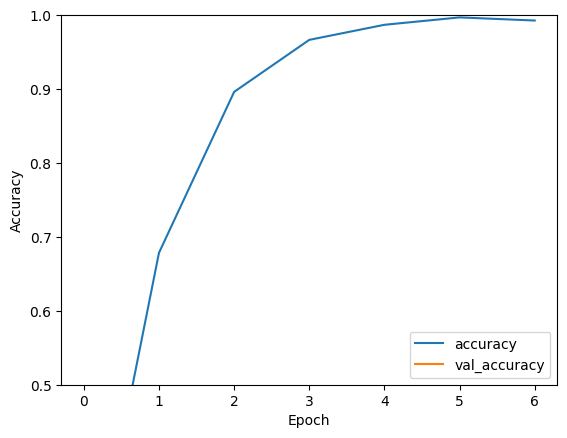

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_df,  labels, verbose=2)

In [8]:
print(test_acc)
print(test_loss)


0.41576921939849854
5.208561420440674
